# Part 2 Solution - Mapping Yelp Search Results

## Obective

- For this CodeAlong, we will be working with the Yelp API results from last class. 
- You will load in the .csv.gz of your yelp results and prepare the data for visualization.
- You will use Plotly Express to create an interactive map with all of the results.

## Tools You Will Use
- Part 1:
    - Yelp API:
        - Getting Started: 
            - https://www.yelp.com/developers/documentation/v3/get_started

    - `YelpAPI` python package
        -  "YelpAPI": https://github.com/gfairchild/yelpapi
- Part 2:

    - Plotly Express: https://plotly.com/python/getting-started/
        - With Mapbox API: https://www.mapbox.com/
        - `px.scatter_mapbox` [Documentation](https://plotly.com/python/scattermapbox/): 




### Applying Code From
- [Advanced Transformations with Pandas - Part 1](https://login.codingdojo.com/m/376/12529/88086)
- [Advanced Transformations with Pandas - Part 2](https://login.codingdojo.com/m/376/12529/88088)

### Goal

- We want to create a map with every restaurant plotted as a scatter plot with detailed information that appears when we hover over a business
- We will use plotly express's `px.scatter_mapbox` function to accomplish this.
    - https://plotly.com/python/scattermapbox/
    
    - Some of the options require a Mapbox API token:
    - However, we will be using the options that DO NOT require a token.
        - https://studio.mapbox.com/

# Loading Data from Part 1

In [1]:
## Plotly is not included in your dojo-env
!pip install plotly

In [2]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

## importing plotly 
import plotly.express as px

In [3]:
## Load in csv.gz
df = pd.read_csv('Data/Fresno-barbecue.csv.gz')
df.head()

id                                  alias  \
0  2Gun8_aVi3zpEj12VFf6YA                     papa-nick-s-fresno   
1  HC_v0TxyQyvHt595crwQZw         the-greatest-bbq-missouri-city   
2  CJcm3JmMQhDUF0wclPu2AQ        slow-smoked-meats-missouri-city   
3  4-TxcY8ZgNquIqMWuWFrCg  seven-seeds-texas-barbecue-rosharon-2   
4  jx7VXB5oUE1RnSKs4zFUHw                  big-horn-bbq-pearland   

                         name  \
0                 Papa Nick’s   
1            The Greatest BBQ   
2           Slow Smoked Meats   
3  Seven Seeds Texas Barbecue   
4                Big Horn BBQ   

                                           image_url  is_closed  \
0                                                NaN      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/5Af1lH...      False   
2  https://s3-media2.fl.yelpcdn.com/bphoto/-Vzlgj...      False   
3  https://s3-media1.fl.yelpcdn.com/bphoto/9odk3x...      False   
4  https://s3-media1.fl.yelpcdn.com/bphoto/TjNvun...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/papa-nick-s-fresno?ad...             1   
1  https://www.yelp.com/biz/the-greatest-bbq-miss...            17   
2  https://www.yelp.com/biz/slow-smoked-meats-mis...             1   
3  https://www.yelp.com/biz/seven-seeds-texas-bar...            21   
4  https://www.yelp.com/biz/big-horn-bbq-pearland...           335   

                                          categories  rating  \
0  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     5.0   
1            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.0   
2  [{'alias': 'catering', 'title': 'Caterers'}, {...     5.0   
3  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.0   
4  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   

                                         coordinates            transactions  \
0     {'latitude': 29.53606, 'longitude': -95.47645}                      []   
1  {'latitude': 29.5943214, 'longitude': -95.5268...  ['delivery', 'pickup']   
2     {'latitude': 29.60216, 'longitude': -95.50744}                      []   
3  {'latitude': 29.5429847, 'longitude': -95.4174...  ['delivery', 'pickup']   
4  {'latitude': 29.5692407905726, 'longitude': -9...            ['delivery']   

                                            location         phone  \
0  {'address1': '1514 B Trammel', 'address2': '',...  1.832916e+10   
1  {'address1': '2304-2428 Texas Pkwy', 'address2...  1.281261e+10   
2  {'address1': None, 'address2': None, 'address3...  1.346310e+10   
3  {'address1': '3040 Cr 48', 'address2': '', 'ad...  1.281615e+10   
4  {'address1': '2300 Smith Ranch Rd', 'address2'...  1.281741e+10   

    display_phone     distance price  
0  (832) 916-0227   660.375100   NaN  
1  (281) 261-2264  8376.697777   NaN  
2  (346) 310-1372  7320.022096   NaN  
3  (281) 615-0496  5096.971199   NaN  
4  (281) 741-3289  8888.390692    $$

## Required Preprocessing 

- 1. We need to get the latitude and longitude for each business as separate columns.
- 2. We also want to be able to show the restaurants:
    - name
    - price
    - type of transactions (pickup/delivery)
    - address

### Separating Latitude and Longitude

In [4]:
## use .apply pd.Series to convert a dict to columns
df['coordinates'].apply(pd.Series)

0
0       {'latitude': 29.53606, 'longitude': -95.47645}
1    {'latitude': 29.5943214, 'longitude': -95.5268...
2       {'latitude': 29.60216, 'longitude': -95.50744}
3    {'latitude': 29.5429847, 'longitude': -95.4174...
4    {'latitude': 29.5692407905726, 'longitude': -9...
..                                                 ...
184  {'latitude': 29.55651499127373, 'longitude': -...
185  {'latitude': 29.60120583838177, 'longitude': -...
186  {'latitude': 29.5646162, 'longitude': -95.5644...
187    {'latitude': 29.625095, 'longitude': -95.56429}
188   {'latitude': 29.572414, 'longitude': -95.569912}

[189 rows x 1 columns]

- Why didn't that work???

In [5]:
## slice out a single test coordinate
test_coord = df.loc[1, 'coordinates']
test_coord

"{'latitude': 29.5943214, 'longitude': -95.5268349}"

In [6]:
type(test_coord)

str

- Its not a dictionary anymore!!! What??
    - CSV files cant store iterables (lists, dictionaries) so they get converted to strings.

### Fixing the String-Dictionaries

- The json module has another version of load and dump called `json.loads` and `json.dumps`
    - These are designed to process STRINGS instead of files. 
    
- If we use `json.loads` we can convert our `string dictionary` into an `actual dictionary`. 

In [7]:
## Use json.loads on the test coordinate
json.loads(test_coord)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

### JSON requires double quotes!
We got a `JSON Decode Error` because JSON was `expecting double quotes` inside
of the dictionary

In [ ]:
# Check the single record
test_coord

### We are now going to use the .replace( ) function to replace single ' with double "

In [8]:
## replace single ' with double " 
test_coord = test_coord.replace("'", '"')
test_coord

'{"latitude": 29.5943214, "longitude": -95.5268349}'

In [9]:
## Use json.loads on the test coordinate, again
json.loads(test_coord)

{'latitude': 29.5943214, 'longitude': -95.5268349}

In [10]:
# viewing type after using json.loads
type(json.loads(test_coord))

dict

### Now, how can we apply this same process to the entire column??

In [11]:
## replace ' with " (entire column)
df['coordinates'] = df['coordinates'].str.replace("'", '"')
## apply json.loads
df['coordinates'] = df['coordinates'].apply(json.loads)

In [12]:
## slice out a single test coordinate
test_coord = df.loc[5, 'coordinates']
test_coord

{'latitude': 29.562035, 'longitude': -95.562823}

In [13]:
type(test_coord)

dict

### Using .apply with pd.Series to convert a dictionary column into multiple columns
This is the process of unpacking the dictionary to columns

In [14]:
## use .apply pd.Series to convert a dict to columns
df['coordinates'].apply(pd.Series)

latitude  longitude
0    29.536060 -95.476450
1    29.594321 -95.526835
2    29.602160 -95.507440
3    29.542985 -95.417495
4    29.569241 -95.385428
..         ...        ...
184  29.556515 -95.377178
185  29.601206 -95.565024
186  29.564616 -95.564453
187  29.625095 -95.564290
188  29.572414 -95.569912

[189 rows x 2 columns]

In [15]:
## Concatenate the 2 new columns and drop the original.
df = pd.concat([df, df['coordinates'].apply(pd.Series)], axis = 1)
#df = df.drop(columns = 'coordinates')
df.head(2)

id                           alias              name  \
0  2Gun8_aVi3zpEj12VFf6YA              papa-nick-s-fresno       Papa Nick’s   
1  HC_v0TxyQyvHt595crwQZw  the-greatest-bbq-missouri-city  The Greatest BBQ   

                                           image_url  is_closed  \
0                                                NaN      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/5Af1lH...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/papa-nick-s-fresno?ad...             1   
1  https://www.yelp.com/biz/the-greatest-bbq-miss...            17   

                                          categories  rating  \
0  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     5.0   
1            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.0   

                                         coordinates            transactions  \
0     {'latitude': 29.53606, 'longitude': -95.47645}                      []   
1  {'latitude': 29.5943214, 'longitude': -95.5268...  ['delivery', 'pickup']   

                                            location         phone  \
0  {'address1': '1514 B Trammel', 'address2': '',...  1.832916e+10   
1  {'address1': '2304-2428 Texas Pkwy', 'address2...  1.281261e+10   

    display_phone     distance price   latitude  longitude  
0  (832) 916-0227   660.375100   NaN  29.536060 -95.476450  
1  (281) 261-2264  8376.697777   NaN  29.594321 -95.526835

In [16]:
df = df.drop(columns = 'coordinates')
df.head(2)

id                           alias              name  \
0  2Gun8_aVi3zpEj12VFf6YA              papa-nick-s-fresno       Papa Nick’s   
1  HC_v0TxyQyvHt595crwQZw  the-greatest-bbq-missouri-city  The Greatest BBQ   

                                           image_url  is_closed  \
0                                                NaN      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/5Af1lH...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/papa-nick-s-fresno?ad...             1   
1  https://www.yelp.com/biz/the-greatest-bbq-miss...            17   

                                          categories  rating  \
0  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     5.0   
1            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.0   

             transactions                                           location  \
0                      []  {'address1': '1514 B Trammel', 'address2': '',...   
1  ['delivery', 'pickup']  {'address1': '2304-2428 Texas Pkwy', 'address2...   

          phone   display_phone     distance price   latitude  longitude  
0  1.832916e+10  (832) 916-0227   660.375100   NaN  29.536060 -95.476450  
1  1.281261e+10  (281) 261-2264  8376.697777   NaN  29.594321 -95.526835

### Activity -Padlet : Unpacking dictionary


- https://padlet.com/swhaley9/unpacking-dictionaries-n19x0tiyn980jr0o

## Creating a Simple Map

- Mapbox API: https://www.mapbox.com/
- Mapbox API Documentation: https://docs.mapbox.com/api/overview/

- Use the plotly express `scatter_mapbox` function

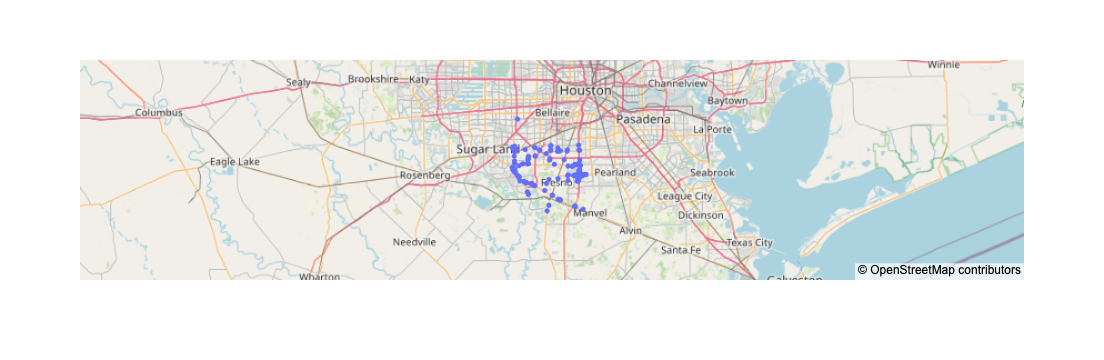

In [17]:
## use scatter_mapbox for map
px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', mapbox_style = 'open-street-map')

### Adding Hover Data

- We want to show the restaurants:
    - name
    - price range
    - rating
    - transaction type (delivery/takeout)
    - address
    
    
- We can use the `hover_name` and `hover_data` arguments for `px.scatter_mapbox` to add this info!

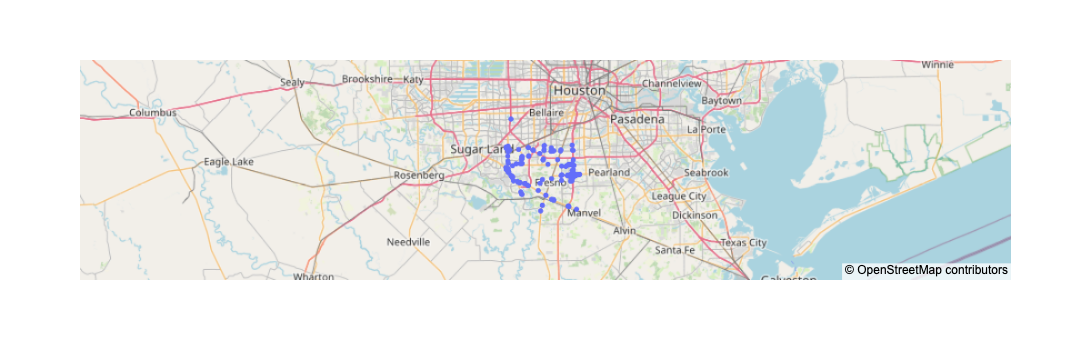

In [18]:
## add hover_name (name) and hover_data for price,rating,location
px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', mapbox_style = 'open-street-map', 
                 hover_name = 'name', hover_data = ['price', 'rating', 'transactions', 'location'])

### Fixing the Location Column

In [19]:
## slice out a test address
test_addr = df.loc[0, 'location']
test_addr

"{'address1': '1514 B Trammel', 'address2': '', 'address3': None, 'city': 'Fresno', 'zip_code': '77545', 'country': 'US', 'state': 'TX', 'display_address': ['1514 B Trammel', 'Fresno, TX 77545']}"

> Also a string-dictionary...

In [20]:
## replace ' with "
df['location'] = df['location'].str.replace("'", '"')
df.head()

id                                  alias  \
0  2Gun8_aVi3zpEj12VFf6YA                     papa-nick-s-fresno   
1  HC_v0TxyQyvHt595crwQZw         the-greatest-bbq-missouri-city   
2  CJcm3JmMQhDUF0wclPu2AQ        slow-smoked-meats-missouri-city   
3  4-TxcY8ZgNquIqMWuWFrCg  seven-seeds-texas-barbecue-rosharon-2   
4  jx7VXB5oUE1RnSKs4zFUHw                  big-horn-bbq-pearland   

                         name  \
0                 Papa Nick’s   
1            The Greatest BBQ   
2           Slow Smoked Meats   
3  Seven Seeds Texas Barbecue   
4                Big Horn BBQ   

                                           image_url  is_closed  \
0                                                NaN      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/5Af1lH...      False   
2  https://s3-media2.fl.yelpcdn.com/bphoto/-Vzlgj...      False   
3  https://s3-media1.fl.yelpcdn.com/bphoto/9odk3x...      False   
4  https://s3-media1.fl.yelpcdn.com/bphoto/TjNvun...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/papa-nick-s-fresno?ad...             1   
1  https://www.yelp.com/biz/the-greatest-bbq-miss...            17   
2  https://www.yelp.com/biz/slow-smoked-meats-mis...             1   
3  https://www.yelp.com/biz/seven-seeds-texas-bar...            21   
4  https://www.yelp.com/biz/big-horn-bbq-pearland...           335   

                                          categories  rating  \
0  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     5.0   
1            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.0   
2  [{'alias': 'catering', 'title': 'Caterers'}, {...     5.0   
3  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.0   
4  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   

             transactions                                           location  \
0                      []  {"address1": "1514 B Trammel", "address2": "",...   
1  ['delivery', 'pickup']  {"address1": "2304-2428 Texas Pkwy", "address2...   
2                      []  {"address1": None, "address2": None, "address3...   
3  ['delivery', 'pickup']  {"address1": "3040 Cr 48", "address2": "", "ad...   
4            ['delivery']  {"address1": "2300 Smith Ranch Rd", "address2"...   

          phone   display_phone     distance price   latitude  longitude  
0  1.832916e+10  (832) 916-0227   660.375100   NaN  29.536060 -95.476450  
1  1.281261e+10  (281) 261-2264  8376.697777   NaN  29.594321 -95.526835  
2  1.346310e+10  (346) 310-1372  7320.022096   NaN  29.602160 -95.507440  
3  1.281615e+10  (281) 615-0496  5096.971199   NaN  29.542985 -95.417495  
4  1.281741e+10  (281) 741-3289  8888.390692    $$  29.569241 -95.385428

In [21]:
## apply json.loads
df['location'] = df['location'].apply(json.loads)

JSONDecodeError: Expecting value: line 1 column 60 (char 59)

# > Ruh roh....

- Hmm, let's slice out a test_address again and let's write a function to accomplish this instead.
    - We can use try and except in our function to get around the errors.

### Fixing Addresses - with a custom function


In [22]:
## slice out test address 
test_addr = df.loc[0, 'location']
test_addr

'{"address1": "1514 B Trammel", "address2": "", "address3": None, "city": "Fresno", "zip_code": "77545", "country": "US", "state": "TX", "display_address": ["1514 B Trammel", "Fresno, TX 77545"]}'

In [23]:
## write a function to just run json.loads on the address
def fix_address(test_addr):
    try:
        return json.loads(test_addr)
    except:
        return 'Error'

In [24]:
## test applying our function
df['location'].apply(fix_address)

0                                                  Error
1                                                  Error
2                                                  Error
3                                                  Error
4      {'address1': '2300 Smith Ranch Rd', 'address2'...
                             ...                        
184    {'address1': '10105 Broadway St', 'address2': ...
185    {'address1': '23718 Commercial Dr', 'address2'...
186    {'address1': '6124 Highway 6', 'address2': '',...
187    {'address1': '13693 Murphy Road', 'address2': ...
188    {'address1': '5515 Highway 6', 'address2': '',...
Name: location, Length: 189, dtype: object

- It worked! Now let's save this as a new column (display_location),
and then let's investigate the businesses that had an "ERROR".

In [25]:
### save a new display_location column using our function
df['display_location'] = df['location'].apply(fix_address)

In [26]:
## filter for businesses with display_location == "ERROR"
errors = df[df['display_location'] == 'Error']
errors.head()

id                                  alias  \
0  2Gun8_aVi3zpEj12VFf6YA                     papa-nick-s-fresno   
1  HC_v0TxyQyvHt595crwQZw         the-greatest-bbq-missouri-city   
2  CJcm3JmMQhDUF0wclPu2AQ        slow-smoked-meats-missouri-city   
3  4-TxcY8ZgNquIqMWuWFrCg  seven-seeds-texas-barbecue-rosharon-2   
5  uHF2wLqsesoVqh0lyHXUBw         texas-biergarten-missouri-city   

                         name  \
0                 Papa Nick’s   
1            The Greatest BBQ   
2           Slow Smoked Meats   
3  Seven Seeds Texas Barbecue   
5            Texas Biergarten   

                                           image_url  is_closed  \
0                                                NaN      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/5Af1lH...      False   
2  https://s3-media2.fl.yelpcdn.com/bphoto/-Vzlgj...      False   
3  https://s3-media1.fl.yelpcdn.com/bphoto/9odk3x...      False   
5  https://s3-media4.fl.yelpcdn.com/bphoto/Fgy60W...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/papa-nick-s-fresno?ad...             1   
1  https://www.yelp.com/biz/the-greatest-bbq-miss...            17   
2  https://www.yelp.com/biz/slow-smoked-meats-mis...             1   
3  https://www.yelp.com/biz/seven-seeds-texas-bar...            21   
5  https://www.yelp.com/biz/texas-biergarten-miss...           283   

                                          categories  rating  \
0  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     5.0   
1            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.0   
2  [{'alias': 'catering', 'title': 'Caterers'}, {...     5.0   
3  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.0   
5  [{'alias': 'german', 'title': 'German'}, {'ali...     4.5   

             transactions                                           location  \
0                      []  {"address1": "1514 B Trammel", "address2": "",...   
1  ['delivery', 'pickup']  {"address1": "2304-2428 Texas Pkwy", "address2...   
2                      []  {"address1": None, "address2": None, "address3...   
3  ['delivery', 'pickup']  {"address1": "3040 Cr 48", "address2": "", "ad...   
5            ['delivery']  {"address1": "6302 Hwy 6", "address2": "Ste Q"...   

          phone   display_phone     distance price   latitude  longitude  \
0  1.832916e+10  (832) 916-0227   660.375100   NaN  29.536060 -95.476450   
1  1.281261e+10  (281) 261-2264  8376.697777   NaN  29.594321 -95.526835   
2  1.346310e+10  (346) 310-1372  7320.022096   NaN  29.602160 -95.507440   
3  1.281615e+10  (281) 615-0496  5096.971199   NaN  29.542985 -95.417495   
5  1.281778e+10  (281) 778-0030  9400.384008    $$  29.562035 -95.562823   

  display_location  
0            Error  
1            Error  
2            Error  
3            Error  
5            Error

In [27]:
## slice out a new test address and inspect
test_addr

'{"address1": "1514 B Trammel", "address2": "", "address3": None, "city": "Fresno", "zip_code": "77545", "country": "US", "state": "TX", "display_address": ["1514 B Trammel", "Fresno, TX 77545"]}'

> After some more investigation, we would find a few issues with these "ERROR" rows.
1. They contained None.
2. They contained an apostrophe in the name.
3. ...?

### Possible Fixes (if we care to/have the time)


- Use Regular Expressions to find an fix the display addresses with " ' " in them
- Use string split to split on the word display address.
    - Then use string methods to clean up

### Moving Forward without those rows (for now)

In [28]:
## remove any rows where display_location == 'ERROR'
df = df.loc[df['display_location'] != 'Error']
df.head()

id                                  alias  \
4   jx7VXB5oUE1RnSKs4zFUHw                  big-horn-bbq-pearland   
6   xkqqY29BviSEtSZeFzc2cg  big-mammas-home-cooking-missouri-city   
7   3G9HjbFXeQCGba7nGUPqoA               skeets-barbeque-pearland   
9   ihHp3_rxOrx-HTp1kg7z0w                     remos-cafe-houston   
11  xPUTiVph-0PTYL-NAxAvGA          old-hickory-inn-missouri-city   

                       name  \
4              Big Horn BBQ   
6   Big Mammas Home Cooking   
7           Skeets Barbeque   
9               ReMo's Cafe   
11          Old Hickory Inn   

                                            image_url  is_closed  \
4   https://s3-media1.fl.yelpcdn.com/bphoto/TjNvun...      False   
6   https://s3-media4.fl.yelpcdn.com/bphoto/Cywt_e...      False   
7   https://s3-media3.fl.yelpcdn.com/bphoto/bw23Hh...      False   
9   https://s3-media1.fl.yelpcdn.com/bphoto/Xf31sy...      False   
11  https://s3-media1.fl.yelpcdn.com/bphoto/rVMKy_...      False   

                                                  url  review_count  \
4   https://www.yelp.com/biz/big-horn-bbq-pearland...           335   
6   https://www.yelp.com/biz/big-mammas-home-cooki...            58   
7   https://www.yelp.com/biz/skeets-barbeque-pearl...           132   
9   https://www.yelp.com/biz/remos-cafe-houston?ad...            79   
11  https://www.yelp.com/biz/old-hickory-inn-misso...            83   

                                           categories  rating  \
4   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   
6   [{'alias': 'soulfood', 'title': 'Soul Food'}, ...     3.5   
7   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   
9   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.5   
11            [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   

              transactions                                           location  \
4             ['delivery']  {"address1": "2300 Smith Ranch Rd", "address2"...   
6   ['delivery', 'pickup']  {"address1": "8731 Hwy 6", "address2": "Ste 10...   
7             ['delivery']  {"address1": "10228 Broadway St", "address2": ...   
9   ['delivery', 'pickup']  {"address1": "8420 S Sam Houston Pkwy W", "add...   
11  ['delivery', 'pickup']  {"address1": "3334 Fm 1092 Rd", "address2": "S...   

           phone   display_phone      distance price   latitude  longitude  \
4   1.281741e+10  (281) 741-3289   8888.390692    $$  29.569241 -95.385428   
6   1.832440e+10  (832) 440-2984   6660.500363   NaN  29.540766 -95.538571   
7   1.713436e+10  (713) 436-0012   9056.534922    $$  29.554431 -95.378215   
9   1.832700e+10  (832) 699-5800  10082.899511   NaN  29.621766 -95.508692   
11  1.281500e+10  (281) 499-8904   9891.253375    $$  29.571845 -95.564201   

                                     display_location  
4   {'address1': '2300 Smith Ranch Rd', 'address2'...  
6   {'address1': '8731 Hwy 6', 'address2': 'Ste 10...  
7   {'address1': '10228 Broadway St', 'address2': ...  
9   {'address1': '8420 S Sam Houston Pkwy W', 'add...  
11  {'address1': '3334 Fm 1092 Rd', 'address2': 'S...

- We want the "display_address" key from the "display_location" dictionaries.
- We could use a .apply and a lamda to slice out the desired key.

In [29]:
## slice out a new test address and inspect
test_addr = df.loc[7, 'display_location']['display_address']
test_addr

['10228 Broadway St', 'Ste 144', 'Pearland, TX 77584']

In [30]:
## use apply and lambda to slice correct key
df['display_address'] = df['display_location'].apply(lambda x: x['display_address'])
df.head(2)

id                                  alias  \
4  jx7VXB5oUE1RnSKs4zFUHw                  big-horn-bbq-pearland   
6  xkqqY29BviSEtSZeFzc2cg  big-mammas-home-cooking-missouri-city   

                      name                                          image_url  \
4             Big Horn BBQ  https://s3-media1.fl.yelpcdn.com/bphoto/TjNvun...   
6  Big Mammas Home Cooking  https://s3-media4.fl.yelpcdn.com/bphoto/Cywt_e...   

   is_closed                                                url  review_count  \
4      False  https://www.yelp.com/biz/big-horn-bbq-pearland...           335   
6      False  https://www.yelp.com/biz/big-mammas-home-cooki...            58   

                                          categories  rating  \
4  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   
6  [{'alias': 'soulfood', 'title': 'Soul Food'}, ...     3.5   

             transactions                                           location  \
4            ['delivery']  {"address1": "2300 Smith Ranch Rd", "address2"...   
6  ['delivery', 'pickup']  {"address1": "8731 Hwy 6", "address2": "Ste 10...   

          phone   display_phone     distance price   latitude  longitude  \
4  1.281741e+10  (281) 741-3289  8888.390692    $$  29.569241 -95.385428   
6  1.832440e+10  (832) 440-2984  6660.500363   NaN  29.540766 -95.538571   

                                    display_location  \
4  {'address1': '2300 Smith Ranch Rd', 'address2'...   
6  {'address1': '8731 Hwy 6', 'address2': 'Ste 10...   

                                  display_address  
4       [2300 Smith Ranch Rd, Pearland, TX 77584]  
6  [8731 Hwy 6, Ste 100, Missouri City, TX 77459]

- Almost done! We want to convert display_address to a string instead of a list of strings.
- We can use the string method .join to do so!

In [31]:
## slice out a test_address
test_add = df.loc[7, 'display_address']
test_add

['10228 Broadway St', 'Ste 144', 'Pearland, TX 77584']

In [32]:
## test using .join with a "\n"
'\n'.join(test_add)
print('\n'.join(test_add))

10228 Broadway St
Ste 144
Pearland, TX 77584


In [33]:
## apply the join to every row with a lambda
df['address'] = df['display_address'].apply(lambda x: '\n'.join(x))
df.head()

id                                  alias  \
4   jx7VXB5oUE1RnSKs4zFUHw                  big-horn-bbq-pearland   
6   xkqqY29BviSEtSZeFzc2cg  big-mammas-home-cooking-missouri-city   
7   3G9HjbFXeQCGba7nGUPqoA               skeets-barbeque-pearland   
9   ihHp3_rxOrx-HTp1kg7z0w                     remos-cafe-houston   
11  xPUTiVph-0PTYL-NAxAvGA          old-hickory-inn-missouri-city   

                       name  \
4              Big Horn BBQ   
6   Big Mammas Home Cooking   
7           Skeets Barbeque   
9               ReMo's Cafe   
11          Old Hickory Inn   

                                            image_url  is_closed  \
4   https://s3-media1.fl.yelpcdn.com/bphoto/TjNvun...      False   
6   https://s3-media4.fl.yelpcdn.com/bphoto/Cywt_e...      False   
7   https://s3-media3.fl.yelpcdn.com/bphoto/bw23Hh...      False   
9   https://s3-media1.fl.yelpcdn.com/bphoto/Xf31sy...      False   
11  https://s3-media1.fl.yelpcdn.com/bphoto/rVMKy_...      False   

                                                  url  review_count  \
4   https://www.yelp.com/biz/big-horn-bbq-pearland...           335   
6   https://www.yelp.com/biz/big-mammas-home-cooki...            58   
7   https://www.yelp.com/biz/skeets-barbeque-pearl...           132   
9   https://www.yelp.com/biz/remos-cafe-houston?ad...            79   
11  https://www.yelp.com/biz/old-hickory-inn-misso...            83   

                                           categories  rating  \
4   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   
6   [{'alias': 'soulfood', 'title': 'Soul Food'}, ...     3.5   
7   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   
9   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.5   
11            [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   

              transactions                                           location  \
4             ['delivery']  {"address1": "2300 Smith Ranch Rd", "address2"...   
6   ['delivery', 'pickup']  {"address1": "8731 Hwy 6", "address2": "Ste 10...   
7             ['delivery']  {"address1": "10228 Broadway St", "address2": ...   
9   ['delivery', 'pickup']  {"address1": "8420 S Sam Houston Pkwy W", "add...   
11  ['delivery', 'pickup']  {"address1": "3334 Fm 1092 Rd", "address2": "S...   

           phone   display_phone      distance price   latitude  longitude  \
4   1.281741e+10  (281) 741-3289   8888.390692    $$  29.569241 -95.385428   
6   1.832440e+10  (832) 440-2984   6660.500363   NaN  29.540766 -95.538571   
7   1.713436e+10  (713) 436-0012   9056.534922    $$  29.554431 -95.378215   
9   1.832700e+10  (832) 699-5800  10082.899511   NaN  29.621766 -95.508692   
11  1.281500e+10  (281) 499-8904   9891.253375    $$  29.571845 -95.564201   

                                     display_location  \
4   {'address1': '2300 Smith Ranch Rd', 'address2'...   
6   {'address1': '8731 Hwy 6', 'address2': 'Ste 10...   
7   {'address1': '10228 Broadway St', 'address2': ...   
9   {'address1': '8420 S Sam Houston Pkwy W', 'add...   
11  {'address1': '3334 Fm 1092 Rd', 'address2': 'S...   

                                      display_address  \
4           [2300 Smith Ranch Rd, Pearland, TX 77584]   
6      [8731 Hwy 6, Ste 100, Missouri City, TX 77459]   
7    [10228 Broadway St, Ste 144, Pearland, TX 77584]   
9   [8420 S Sam Houston Pkwy W, Ste 260, Houston, ...   
11  [3334 Fm 1092 Rd, Ste 400, Missouri City, TX 7...   

                                              address  
4             2300 Smith Ranch Rd\nPearland, TX 77584  
6        8731 Hwy 6\nSte 100\nMissouri City, TX 77459  
7      10228 Broadway St\nSte 144\nPearland, TX 77584  
9   8420 S Sam Houston Pkwy W\nSte 260\nHouston, T...  
11  3334 Fm 1092 Rd\nSte 400\nMissouri City, TX 77459

In [34]:
test_add = df.loc[7, 'address']
test_add

'10228 Broadway St\nSte 144\nPearland, TX 77584'

### Lastly, Fixing Transactions Column

In [35]:
# Looking at a test transaction
test_transaction = df.loc[7, 'transactions']
test_transaction

"['delivery']"

In [36]:
type(test_transaction)

str

- This is also a string and needs to be converted to a list.

In [37]:
# Replacing single ' with double "
saved_test = test_transaction.replace("'", '"')
saved_test

'["delivery"]'

In [38]:
# Using json.loads on saved_test
json.loads(saved_test)

['delivery']

In [39]:
# Applying transformations to entire column

# Create a new column where the single quotes are replaced with double quotes
df['transactions_split'] = df['transactions'].str.replace("'", '"')
# Apply json.loads to entire column
df['transactions_split'] = df['transactions_split'].apply(json.loads)
df['transactions_split'].head()

4             [delivery]
6     [delivery, pickup]
7             [delivery]
9     [delivery, pickup]
11    [delivery, pickup]
Name: transactions_split, dtype: object

In [40]:
df['transactions_split'].value_counts()

[delivery]            43
[delivery, pickup]    43
[]                    13
[pickup, delivery]    12
[pickup]               2
Name: transactions_split, dtype: int64

In [41]:
# Converting transactions column into a one-hot-encoded column
exploded = df.explode('transactions_split')
exploded[['name', 'transactions', 'transactions_split']].head()

name            transactions transactions_split
4             Big Horn BBQ            ['delivery']           delivery
6  Big Mammas Home Cooking  ['delivery', 'pickup']           delivery
6  Big Mammas Home Cooking  ['delivery', 'pickup']             pickup
7          Skeets Barbeque            ['delivery']           delivery
9              ReMo's Cafe  ['delivery', 'pickup']           delivery

In [42]:
# remove NaNs and find unique values
cols_to_make = exploded['transactions_split'].dropna().unique()
cols_to_make

array(['delivery', 'pickup'], dtype=object)

In [43]:
# Using a for loop with .str.contains to create new columns
for col in cols_to_make:
    df[col] = df['transactions'].str.contains(col)
df.head()

id                                  alias  \
4   jx7VXB5oUE1RnSKs4zFUHw                  big-horn-bbq-pearland   
6   xkqqY29BviSEtSZeFzc2cg  big-mammas-home-cooking-missouri-city   
7   3G9HjbFXeQCGba7nGUPqoA               skeets-barbeque-pearland   
9   ihHp3_rxOrx-HTp1kg7z0w                     remos-cafe-houston   
11  xPUTiVph-0PTYL-NAxAvGA          old-hickory-inn-missouri-city   

                       name  \
4              Big Horn BBQ   
6   Big Mammas Home Cooking   
7           Skeets Barbeque   
9               ReMo's Cafe   
11          Old Hickory Inn   

                                            image_url  is_closed  \
4   https://s3-media1.fl.yelpcdn.com/bphoto/TjNvun...      False   
6   https://s3-media4.fl.yelpcdn.com/bphoto/Cywt_e...      False   
7   https://s3-media3.fl.yelpcdn.com/bphoto/bw23Hh...      False   
9   https://s3-media1.fl.yelpcdn.com/bphoto/Xf31sy...      False   
11  https://s3-media1.fl.yelpcdn.com/bphoto/rVMKy_...      False   

                                                  url  review_count  \
4   https://www.yelp.com/biz/big-horn-bbq-pearland...           335   
6   https://www.yelp.com/biz/big-mammas-home-cooki...            58   
7   https://www.yelp.com/biz/skeets-barbeque-pearl...           132   
9   https://www.yelp.com/biz/remos-cafe-houston?ad...            79   
11  https://www.yelp.com/biz/old-hickory-inn-misso...            83   

                                           categories  rating  \
4   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   
6   [{'alias': 'soulfood', 'title': 'Soul Food'}, ...     3.5   
7   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.0   
9   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.5   
11            [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   

              transactions  ...      distance  price   latitude  longitude  \
4             ['delivery']  ...   8888.390692     $$  29.569241 -95.385428   
6   ['delivery', 'pickup']  ...   6660.500363    NaN  29.540766 -95.538571   
7             ['delivery']  ...   9056.534922     $$  29.554431 -95.378215   
9   ['delivery', 'pickup']  ...  10082.899511    NaN  29.621766 -95.508692   
11  ['delivery', 'pickup']  ...   9891.253375     $$  29.571845 -95.564201   

                                     display_location  \
4   {'address1': '2300 Smith Ranch Rd', 'address2'...   
6   {'address1': '8731 Hwy 6', 'address2': 'Ste 10...   
7   {'address1': '10228 Broadway St', 'address2': ...   
9   {'address1': '8420 S Sam Houston Pkwy W', 'add...   
11  {'address1': '3334 Fm 1092 Rd', 'address2': 'S...   

                                      display_address  \
4           [2300 Smith Ranch Rd, Pearland, TX 77584]   
6      [8731 Hwy 6, Ste 100, Missouri City, TX 77459]   
7    [10228 Broadway St, Ste 144, Pearland, TX 77584]   
9   [8420 S Sam Houston Pkwy W, Ste 260, Houston, ...   
11  [3334 Fm 1092 Rd, Ste 400, Missouri City, TX 7...   

                                              address  transactions_split  \
4             2300 Smith Ranch Rd\nPearland, TX 77584          [delivery]   
6        8731 Hwy 6\nSte 100\nMissouri City, TX 77459  [delivery, pickup]   
7      10228 Broadway St\nSte 144\nPearland, TX 77584          [delivery]   
9   8420 S Sam Houston Pkwy W\nSte 260\nHouston, T...  [delivery, pickup]   
11  3334 Fm 1092 Rd\nSte 400\nMissouri City, TX 77459  [delivery, pickup]   

   delivery pickup  
4      True  False  
6      True   True  
7      True  False  
9      True   True  
11     True   True  

[5 rows x 23 columns]

### Final Map

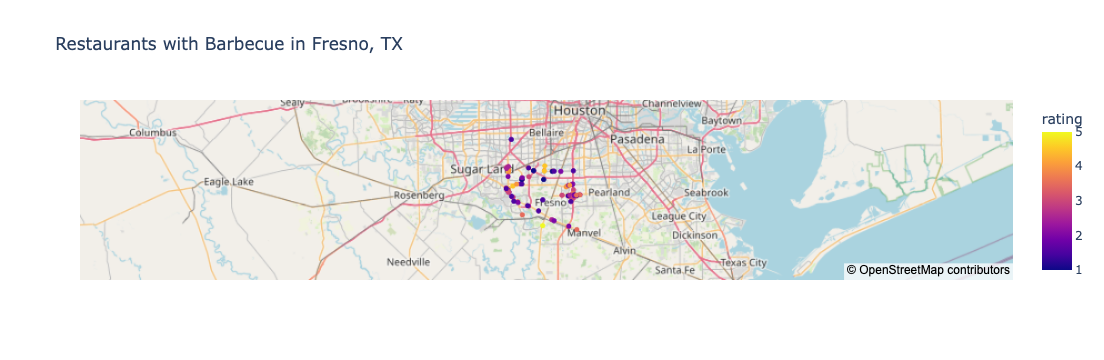

In [44]:
## make our final map and save as varaible
pfig = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', 
                        mapbox_style = 'open-street-map', hover_name = 'name',
                         hover_data = ['price', 'rating', 'address', 'pickup', 
                                      'delivery'],
                         color = 'rating',
                         title = 'Restaurants with Barbecue in Fresno, TX')

pfig.show()